# Data Analysis Project: Asian Recipes (the Woks of Life)

In America, **Asian Food** is often thought of as simply takeout, limited to dishes like Beef with Broccoli and General Tso's Chicken. Of course, these are an integral part to the history of Chinese-Americans in the US, but there are thousands of delicious recipes out there from every culture, from Japanese to Korean to Thai. In this ML Project, I attempt to highlight the diversity of these dishes and discover correlations between ingredients, reviews, preparation time, and calorie count.

All data is scraped from thewoksoflife.com using a custom-built recipe scraper located in the same repository as this Jupyter Notebook. This dataset is roughly scraped, with many missing values and duplicates. The original dataset consists of 1450 recipes with 9 features, including Name, Prep Time, Cook Time, Total Time, Ingredients, Calories, Average Rating, Review Count, and URL.

## Data

This CSV file contains 1450 recipes with 9 features, listed as follows:

- Average Rating    **(float64)**
- Calories          **(object)**
- Category          **(object)**
- Cook Time         **(object)**
- Ingredients       **(object)**
- Name              **(object)**
- Prep Time         **(object)**
- Review Count      **(float64)**
- Total Time        **(object)**
- URL               **(object)**

In [1]:
import pandas as pd

data = pd.read_csv("asian_recipes.csv")
data.head()

,Name,Prep Time,Cook Time,Total Time,Ingredients,Calories,Review Count,Average Rating,Category,URL
0,Slow Roasted Tomato Pasta,PT15M,PT195M,PT210M,"1 1/2 - 2 pounds tomatoes ((700-900g))', 'extr...",576 kcal,2.0,5.0,Main Course,https://thewoksoflife.com/roasted-tomato-pasta/
1,Yaki Udon,PT15M,PT25M,PT40M,"1 pound frozen udon noodles ((450g, or 200g dr...",312 kcal,5.0,5.0,Noodles,https://thewoksoflife.com/yaki-udon/
2,Drunken Noodles (Pad Kee Mao),PT20M,PT10M,PT30M,"2 tablespoons water', '12 ounces sliced chicke...",444 kcal,26.0,5.0,Noodles and Pasta,https://thewoksoflife.com/drunken-noodles-pad-...
3,Yunnan Rice Noodle Soup (云南小锅米线),PT60M,NaN,PT75M,"200 g ground pork ((about 7 ounces, 80% lean; ...",565 kcal,6.0,5.0,Noodle Soup,https://thewoksoflife.com/yunnan-rice-noodle-s...
4,Poor Man’s Thai Noodles,PT10M,PT10M,PT20M,"12 ounces fresh wide rice noodles ((340g))', '...",201 kcal,2.0,5.0,Noodles,https://thewoksoflife.com/poor-mans-thai-noodles/


# Data Cleaning
As you may see, this file needs a lot of cleaning. We need to rearrange the columns in a sensible way, clean the ingredients section, convert the time into minutes, drop duplicates, and deal with missing values.

In [2]:
"""
It looks like we have a number of issues: there seem to be double parenthesis, single parenthesis, numbers, fractions, 
periods,dashes, slashes, and apostrophes. 

Our goal is to visualize the ingredients used and discover trends: numbers & measurements interfere with that, so we will
remove them. The strings_to_remove list contains regex strings representing the above strings.
We simply want a string containing ingredients separated by a comma.

"""
# Rearranging Columns
data = data[['Name', 'Category', 'Prep Time', 'Cook Time', 'Total Time', 'Ingredients', 'Calories', 'Average Rating', 
             'Review Count', 'URL']]

# define a function to remove unneeded strings from rows in dataframe
def remove_string(df, col_name, string_to_remove):
    df[col_name] = df[col_name].str.replace(string_to_remove, '')
    
strings_to_remove = [r"\(([^()]*\))", r"\([^()]*\)", '\d+', r'\d+\/\d+', '.', '-', '/', "'", '¼', '½', '⅛', '¾', '⅔'] 
for num_strings in range(len(strings_to_remove)):
    remove_string(data, 'Ingredients', strings_to_remove[num_strings])

chars_to_remove = ['P', 'T', 'M', 'kcal'] # remove these characters from cooking times / calories
for num_chars in range(len(chars_to_remove)):
    remove_string(data, 'Prep Time', chars_to_remove[num_chars])
    remove_string(data, 'Cook Time', chars_to_remove[num_chars])
    remove_string(data, 'Total Time', chars_to_remove[num_chars])
    remove_string(data, 'Calories', chars_to_remove[num_chars])
    
# Remove measurements from ingredients column
remove_measurements = ['gram', 'gm', 'gms', 'grams', 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'oz', 
                       'slices', 'slice', 'pound', 'pounds', 'sheets', 'sheet', 'cloves', 'packages', 'ounce', 'ounces', 
                       'handful of', 'chopped']

remove_words = r'\b(?:{})\b'.format('|'.join(remove_measurements))
data['Ingredients'] = data['Ingredients'].str.replace(remove_words, '')   # Remove measurement words
data['Ingredients'] = data['Ingredients'].str.lower()                     # Standardize ingredient names by lowercasing everything

display(data)

,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Slow Roasted Tomato Pasta,Main Course,15,195,210,"tomatoes , extra virgin olive oil, salt, ...",576,5.0,2.0,https://thewoksoflife.com/roasted-tomato-pasta/
1,Yaki Udon,Noodles,15,25,40,"frozen udon noodles , butter , clove garl...",312,5.0,5.0,https://thewoksoflife.com/yaki-udon/
2,Drunken Noodles (Pad Kee Mao),Noodles and Pasta,20,10,30,"water, sliced chicken thighs or chicken br...",444,5.0,26.0,https://thewoksoflife.com/drunken-noodles-pad-...
3,Yunnan Rice Noodle Soup (云南小锅米线),Noodle Soup,60,NaN,75,"g ground pork , shaoxing wine , dark soy ...",565,5.0,6.0,https://thewoksoflife.com/yunnan-rice-noodle-s...
4,Poor Man’s Thai Noodles,Noodles,10,10,20,"fresh wide rice noodles , brown sugar, h...",201,5.0,2.0,https://thewoksoflife.com/poor-mans-thai-noodles/
...,...,...,...,...,...,...,...,...,...,...
1537,Chicken and Thai Basil Stir-Fry,Chicken and Poultry,5,10,15,"chicken breast, fish sauce, soy sauce, ...",324,NaN,NaN,https://thewoksoflife.com/chicken-and-thai-bas...
1538,Easy Scallion and Ginger Shrimp Stir Fry,Fish and Seafood,10,5,15,"shrimp , scallions, a inch piece of ginger...",179,4.5,2.0,https://thewoksoflife.com/scallion-and-ginger-...
1539,Everyday Chinese Vegetable Stir-Fry,Vegetables,10,10,20,"stalks celery , carrots , snow peas , f...",166,NaN,NaN,https://thewoksoflife.com/everyday-vegetable-s...
1540,Snow Pea Leaves with Garlic,Vegetables,15,5,20,"snow pea leaves , vegetable oil, garlic ...",NaN,5.0,1.0,https://thewoksoflife.com/stir-fried-snow-pea-...


In [3]:
# Drop Duplicate Recipes
orig_rows = data.shape[0]
data = data.drop_duplicates()
new_rows = data.shape[0]
print("Number of duplicate rows: ", abs(new_rows - orig_rows))

Number of duplicate rows:  669


In [9]:
# The format of the ingredients looks wacky, let's take a full look at them!
# pd.set_option('display.max_colwidth', -1)
# display(data)

In [4]:
# We should also make sure our categories are grouped together well
display(data.Category.unique())

array(['Main Course', 'Noodles', 'Noodles and Pasta', 'Noodle Soup',
       'Soup', 'Pasta', 'Dim Sum', 'Soups', 'Vegetarian', 'Salad',
       "Easy', 'Quick &amp;amp", "Noodles', 'Rice &amp;amp", 'Dumplings',
       'Holiday Recipes', 'Beef', 'Chicken and Poultry', 'Vegetables',
       'Chicken', 'Noodles and Pasa', 'Soups and Stocks',
       'Noodles ad Pasta', nan, 'Rice', 'Pork', 'Appetizer',
       "Pork', 'Ribs", 'Fish and Seafood', "Fish &amp; Seafood', 'Rice",
       'Vegetable', 'Lamb', 'Appetizers and Snacks', "Chicken', 'Rice",
       'Appetizers', "Chicken &amp;amp', 'Poultry",
       "Chicken &amp;amp', 'Holiday', 'Poultry", 'Chicken ad poultry',
       'Salads', 'Chinese takeout', 'Sandwiches', 'Bread and Pizza',
       'Tofu', 'Beef recipes', 'Fish &amp; Seafood', 'Fish', 'Shrimp',
       'Seafood', "Fish &amp;amp', 'Seafood", 'Condiments',
       'Chinese New Year', 'Fish anbs Seafood', 'Eggs',
       "Fish and Seafood', 'Pork', 'Tofu", "Main Course', 'Pork",
       'Sa

In [5]:
# Since it looks like a lot of categories aren't properly labeled, we should use a map to group them together.
replace_map = {'Noodles and Pasta': 'Noodles', 'Chicken': 'Poultry', 'Chicken and Poultry': 'Poultry', 
               'Chicken &amp;amp': 'Chicken', 'Appetizers and Snacks': 'Appetizers', 'Chicken ad poultry': 'Poultry', 
              'Soups and Stocks': 'Soup', 'Salads': 'Vegetarian', 'Vegetables': 'Vegetarian', 'Noodle Soup': 'Soup', 
              'Bread and Pizza': 'Bread', 'Beef recipes': 'Beef', 'Fish and Seafood': 'Seafood','Fish': 'Seafood',
              'Fish anbs Seafood': 'Seafood', 'Shrimp': 'Seafood', 'Tofu': 'Vegetarian', 'Pasta': 'Noodles',
              'Easy': 'Quick and Easy','Soups &amp;amp': 'Soup', 'Dessert and Sweet Stuff': 'Desserts', 
               'Vegetable': 'Vegetarian', 'Noodles ad Pasta': 'Noodles', 'appetizers and dumplings': 'Appetizers', 
               'Appetizer': 'Appetizers', 'Pizza': 'Bread', 'Bread and Pizzaq': 'Bread',
              'Desserts &amp; Sweet stuff': 'Dessert', 'Breakfast and Brunch': 'Breakfast', 'desserts': 'Dessert', 
              'desserts and Sweet Stuff': 'Dessert', 'Dessert and Sweet Stuff': 'Dessert', ' Salad': 'Vegetarian', 
              'Vegetabkles': 'Vegetarian', 'Noodles and Pasa': 'Noodles', "Fish &amp;amp', 'Seafood": 'Seafood', 
               'Rice &amp;amp': 'Rice', "Fish &amp; Seafood', 'Rice": 'Rice', 
               "Fish and Seafood', 'Pork', 'Tofu": "Seafood", "Main Course', 'Pork": 'Pork', 
               "Easy', 'Quick &amp;amp": 'Quick and Easy', "Soups &amp;amp', 'Stocks": "Soup", "Pork', 'Ribs": "Pork", 
              "Chinese bakery": "Bread",", 'Salad": "Vegetarian", "Vegetables', 'Vegetarian": "Vegetarian", 
               "Chicken &amp;amp', 'Holiday', 'Poultry": "Poultry", "Chicken &amp;amp', 'Poultry": "Poultry", 
               "Chicken', 'Rice": "Rice", "Salad": "Vegetarian", "Noodles', 'Rice &amp;amp": "Noodles", 
              "Breakfast', 'Desserts &amp; Sweet stuff": "Dessert", "Breakfast', 'Brunch', 'Dessert": "Dessert",
              "Breakfast and Brunch', 'Dessert and Sweet Stuff": "Dessert", "Egg": "Eggs", "Soups": 'Soup',
              "Appetizer', 'Vegetables": "Vegetarian", "Appetizers', 'Soup": "Soup", "Baking": "Bread", 
              "Bread &amp;amp', 'Pizza": "Bread", "Fish &amp; Seafood": "Seafood", "Appetizer', 'Salad": "Vegetarian", 
              "Salad', 'Vegetables": "Vegetarian", "Sandwich": "Bread", "Sandwiches": "Bread", "Vegan": "Vegetarian"}

data['Category'] = data['Category'].map(replace_map).fillna(data['Category'])
display(data.head())


,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Slow Roasted Tomato Pasta,Main Course,15,195,210,"tomatoes , extra virgin olive oil, salt, ...",576,5.0,2.0,https://thewoksoflife.com/roasted-tomato-pasta/
1,Yaki Udon,Noodles,15,25,40,"frozen udon noodles , butter , clove garl...",312,5.0,5.0,https://thewoksoflife.com/yaki-udon/
2,Drunken Noodles (Pad Kee Mao),Noodles,20,10,30,"water, sliced chicken thighs or chicken br...",444,5.0,26.0,https://thewoksoflife.com/drunken-noodles-pad-...
3,Yunnan Rice Noodle Soup (云南小锅米线),Soup,60,NaN,75,"g ground pork , shaoxing wine , dark soy ...",565,5.0,6.0,https://thewoksoflife.com/yunnan-rice-noodle-s...
4,Poor Man’s Thai Noodles,Noodles,10,10,20,"fresh wide rice noodles , brown sugar, h...",201,5.0,2.0,https://thewoksoflife.com/poor-mans-thai-noodles/


In [12]:
# Let's make sure everything is fine
li = data.groupby(['Category']).size() .reset_index(name='counts')
li

,Category,counts
0,Appetizers,58
1,Beef,54
2,Beverages,1
3,Bread,47
4,Breakfast,9
5,Chinese,1
6,Chinese New Year,2
7,Chinese takeout,1
8,Condiments,6
9,Dessert,77


In [6]:
# Columns look fine for the most part, but there are a couple of columns that are sparse in count. This won't be relevant
# for our visualization later, so let's drop everything under 15.

counts = data['Category'].value_counts()
data = data[data.isin(counts.index[counts >= 15]).values]
new_li = data.groupby(['Category']).size().reset_index(name='counts').sort_values(['counts'], ascending=True)
new_li

,Category,counts
4,Main Course,16
8,Rice,41
2,Bread,47
10,Soup,49
1,Beef,55
0,Appetizers,59
9,Seafood,62
6,Pork,75
3,Dessert,79
5,Noodles,96


# Exploratory Data Analysis
Let's evaluate the data and try to discover any possible trends!

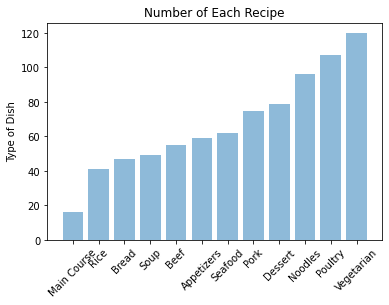

In [7]:
import matplotlib.pyplot as plt
import numpy as np

names = list(new_li['Category'])
counts = list(new_li['counts'])
y_pos = np.arange(len(counts))


plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation=45)
plt.ylabel('Type of Dish')
plt.title('Number of Each Recipe')

plt.show()


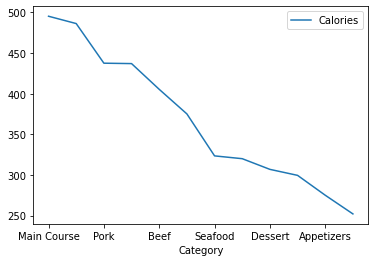

In [8]:
# We didn't drop null values earlier on since most values are filled and completion of a row is not critical to visualization.
# Here, we'll drop any rows with a "NA" number of calories are compare which type of food has the most calories on average.

data["Calories"] = pd.to_numeric(data["Calories"])
calories = data.dropna(subset = ['Calories'])
calories.groupby('Category').Calories.mean().sort_values(ascending=False).plot(legend=True)


In [9]:
average_ratings = calories.groupby('Category')['Average Rating'].mean().sort_values(ascending=False)
average_ratings

Category
Seafood        4.930417
Vegetarian     4.908788
Soup           4.902857
Beef           4.894681
Main Course    4.894615
Bread          4.885937
Rice           4.882000
Poultry        4.869565
Pork           4.860952
Noodles        4.860854
Appetizers     4.856731
Dessert        4.838400
Name: Average Rating, dtype: float64

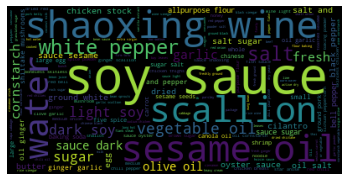

In [10]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(' '.join(data['Ingredients']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Summary

In this notebook, I've cleaned the recipe dataset, removing extraneous numbers, misnamed categories, etc. I've also did some basic exploratory data analysis and developed several graphs showcasing factors like average rating per categor, most popular ingredients, calories per category, etc. In the future, when more ideas for analysis come to mind, I will be developing more graphs in order to better capture the spirit of the data. In the meantime, I thank you for reading this notebook, and if you're interested in how I built the collaborative filtering based recommender system, I direct you to my other notebook, "Recipe_Recommender_System.ipynb"!

In [12]:
data.to_csv('cleaned_asian_recipes.csv')